<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/find_other_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
def calculate_overlap_percentage(box1, box2):
    # box1: (x1, y1, x2, y2)
    # box2: (x1, y1, x2, y2)

    # 겹치는 영역 좌표 계산
    x_overlap = max(0, min(box1[2], box2[2]) - max(box1[0], box2[0]))
    y_overlap = max(0, min(box1[3], box2[3]) - max(box1[1], box2[1]))
    overlap_area = x_overlap * y_overlap

    # 박스1과 겹치는 전체 영역 계산
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])

    # 겹치는 영역의 크기를 백분율로 계산
    overlap_percentage = (overlap_area / box1_area) * 100

    return overlap_percentage

In [46]:
import cv2
from google.colab.patches import cv2_imshow

def find_other_car(number,x1,y1,x2,y2):
    image_path = str(number)+'.png'
    image = cv2.imread(image_path)

    #내 차량 중심 위치
    car_center_x = 475 #우리 화질의 x 절반
    car_center_y = 543 #우리 화질의 y 그대로
    car_width = 1 #박스의 좌우
    car_height = 350 #박스의 높낮이

    #바운더리 박스 생성
    #1m를 픽셀로 변환(1m = 100픽셀)
    m_to_pixel = 100

    #내 차 위치와 크기를 기반으로 바운더리 박스 좌표 계산
    box_x1 = int(car_center_x - (car_width / 2))
    box_y1 = int(car_center_y - (car_height / 2))
    box_x2 = int(car_center_x - (car_width / 2))
    box_y2 = int(car_center_y - (car_height / 2))

    # ?m 바운더리 박스의 좌표 계산 (내 차량 기준으로 +-0.5m)
    box_x1 -= int(2.5 * m_to_pixel)
    box_y1 -= int(1.2 * m_to_pixel)
    box_x2 += int(2.5 * m_to_pixel)
    box_y2 += int(1.2 * m_to_pixel)

    #바운더리 박스 그리기
    cv2.rectangle(image, (box_x1,box_y1),(box_x2,box_y2),(0,255,0),2)
    cv2.rectangle(image, (x1,y1),(x2,y2),(255,0,0),2)

    #사진보여주고 저장
    cv2_imshow(image)
    output_image_path = 'result_image_'+str(number)+'.jpg'
    cv2.imwrite(output_image_path, image)


    box1 = (x1, y1, x2, y2) #상대차
    box2 = (box_x1, box_y1, box_x2, box_y2) #내차

    overlap_percentage = calculate_overlap_percentage(box1, box2)
    print(f"Overlap Percentage: {overlap_percentage:.2f}%")


In [24]:
# 예시 박스 (x1, y1, x2, y2)
box1 = (190, 185, 520, 410) #상대차 7번
box2 = (224, 248, 724, 488) #내차

overlap_percentage = calculate_overlap_percentage(box1, box2)
print(f"Overlap Percentage: {overlap_percentage:.2f}%")


Overlap Percentage: 64.58%


In [25]:
box1 = (205, 195, 420, 355) #상대차 6번
box2 = (224, 248, 724, 488) #내차

overlap_percentage = calculate_overlap_percentage(box1, box2)
print(f"Overlap Percentage: {overlap_percentage:.2f}%")

Overlap Percentage: 60.97%


In [26]:
box1 = (195, 215, 330, 300) #상대차 5번
box2 = (224, 248, 724, 488) #내차

overlap_percentage = calculate_overlap_percentage(box1, box2)
print(f"Overlap Percentage: {overlap_percentage:.2f}%")

Overlap Percentage: 48.03%


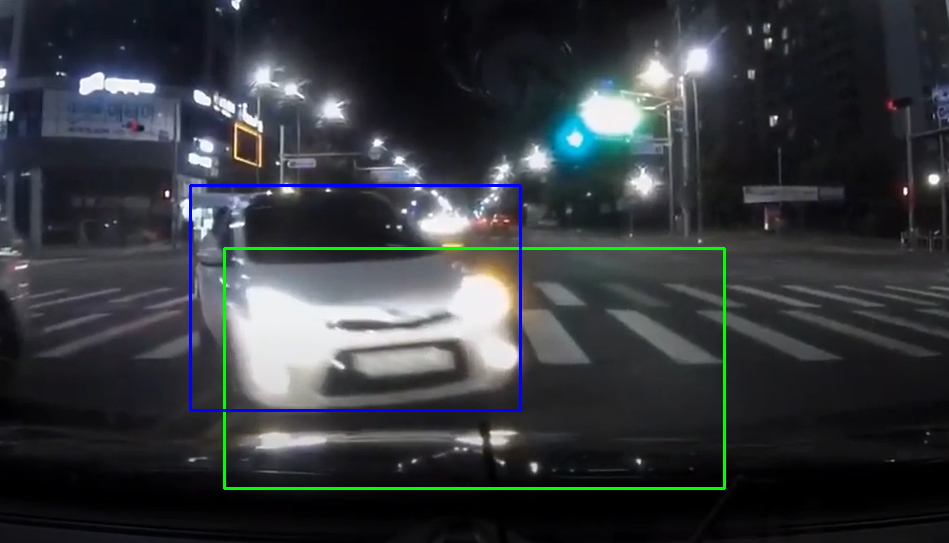

Overlap Percentage: 64.58%


In [47]:
find_other_car(7,190, 185, 520, 410)

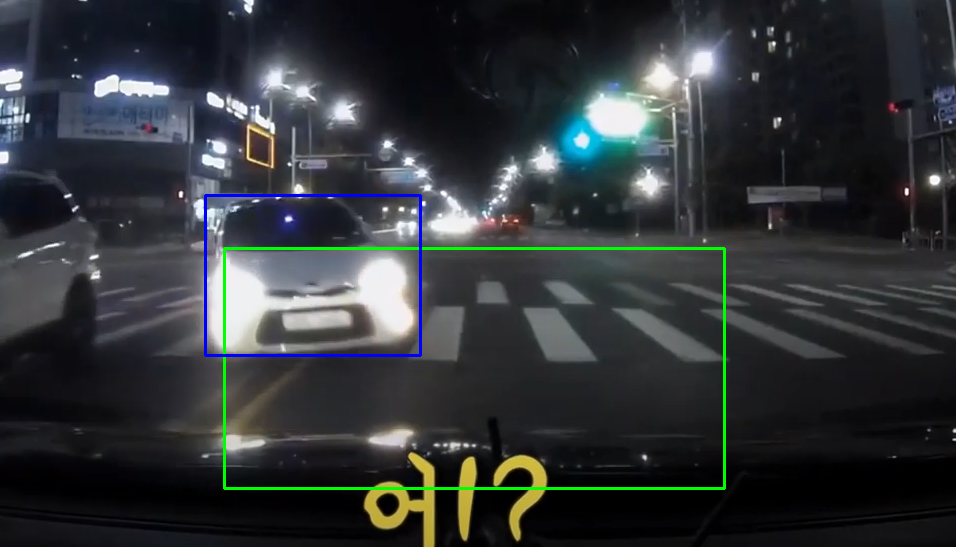

Overlap Percentage: 60.97%


In [48]:
find_other_car(6,205, 195, 420, 355)

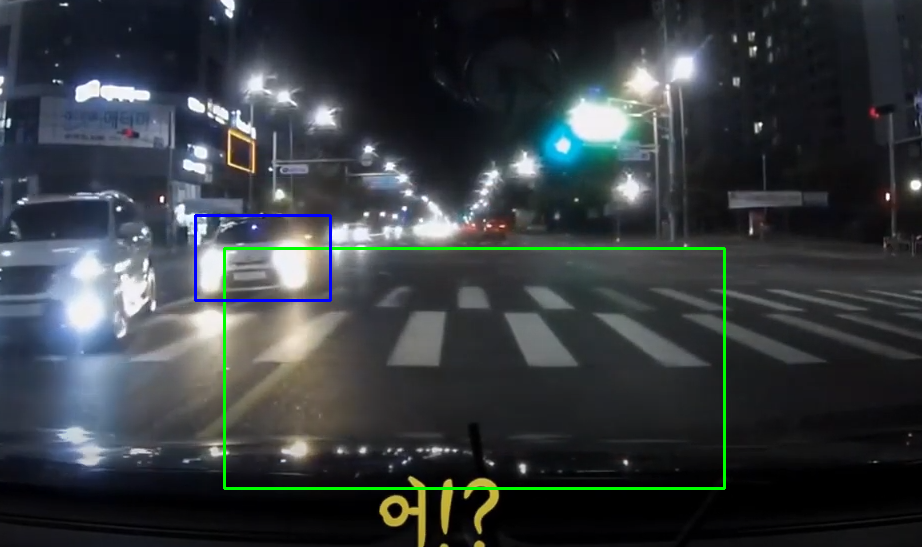

Overlap Percentage: 48.03%


In [49]:
find_other_car(5,195, 215, 330, 300)